# Data Sources

This notebooks open and make some check in data sources which should be used in my Capstone project.

In [1]:
import pandas as pd
import numpy as np

from datetime import date, timedelta
import calendar

import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import logging

logging.basicConfig(filename='00-runall.log' ,format='%(asctime)s | %(levelname)s: %(message)s', level=20)
logging.info('I start to run your Notebook ! -- Good Luck :-) ')


In [3]:
#compute the last day of the month for a given date
def last_day_month(pricing_date):
    last_day = pricing_date.replace(day=calendar.monthrange(pricing_date.year, pricing_date.month)[1])
    return last_day

In [4]:
# declare some constants
path_data_source = '../../data source/_anonymized/'

## funds_scope.csv
This is the pivot table of my data model. The unique key <b>fund_id</b> allows relationships with other data sources (tables).
<b>funds_scope.csv</b> is an extract from some tables in our funds repository. The extract contains a subset of all funds (UCITS) with several columns:
- fund_id which will be my pivot key [SRC_UID]
- the fund name <b>TO BE REMOVE WHEN SENT TO EPFL</b>
- if the funds is multiple manager structure
- if the fund is <i>soft closed</i> which mean only existing client can invest in; this restrict the potential new client
- the risk level of the fund from low to high risk whic will be encoded
- the launching date of the fund; I will use it to calculate the [AGE] of the funds
- the number of share (<b>a share is an 'entry door' for investor</b>) depending on registrtaion country and investor profile; more shares a fund have more different types of client we can accept

### Duplicates
The funds scope has some duplicates rows (NAME) but different SRC_UID (unique number). The reason is mainly related to leagl perspective and major changes in the investment strategy. If during his life a fund has a major change in his investment strategy, the regulator requires that we start a new performance tracking.

For the project I will keep the oldest line <b>DATE SHARE</b> when duplicates exist


### Anonymization
The <b>NAME</b> colum will be removed wehn sent to EPFL Extension School

In [5]:
# load the file from source repository
ds1 = pd.read_csv(path_data_source+'funds_scope.csv', delimiter=',')

In [6]:
print(ds1.shape)
print(ds1.columns)
#display a few rows
ds1.head(15)

(92, 10)
Index(['Unnamed: 0', 'MULTI_MANAGER_STRUCTURE', 'NAME', 'SOFTCLOSING',
       'SRC_UID', 'RISK_LEVEL', 'DATE_SHARE', 'CNT_SHARE',
       'Strategy Capability', 'Capability IS Strategic'],
      dtype='object')


,Unnamed: 0,MULTI_MANAGER_STRUCTURE,NAME,SOFTCLOSING,SRC_UID,RISK_LEVEL,DATE_SHARE,CNT_SHARE,Strategy Capability,Capability IS Strategic
0,0,0,Balearica pavonina,1.0,198188413318323,Moderate risk,03.07.2014,11,Absolute Return,Yes
1,1,0,Gekko gecko,0.0,206670770,High risk,27.04.2000,13,Emerging Markets,Yes
2,2,1,Lepilemur rufescens,0.0,181701414249,Moderate risk,26.06.2006,18,Emerging Markets,Yes
3,3,0,Echimys chrysurus,0.0,206670742,High risk,30.11.1995,14,Thematic,Yes
4,4,1,Melophus lathami,0.0,323418458,Low / moderate risk,10.02.1992,8,Core Bonds,No
5,5,0,Boa constrictor mexicana,0.0,40232932742,Low / moderate risk,06.11.2003,7,Core Bonds,No
6,6,0,Psophia viridis,0.0,36740368922,Low / moderate risk,29.08.2003,5,Core Bonds,No
7,7,1,Alcelaphus buselaphus cokii,0.0,188703120510450,High risk,12.07.2011,12,Emerging Markets,Yes
8,8,1,Antidorcas marsupialis,0.0,272675524722,High risk,14.05.2007,26,Thematic,Yes
9,9,0,Hystrix indica,0.0,186494805556422,Moderate / high risk,09.04.2010,13,Absolute Return,Yes


In [7]:
# sort the dataframe by name, date_share (ascending), cnt_share (descending)
ds1.sort_values(['NAME','DATE_SHARE','CNT_SHARE'], axis=0, ascending=[True,True,False])

,Unnamed: 0,MULTI_MANAGER_STRUCTURE,NAME,SOFTCLOSING,SRC_UID,RISK_LEVEL,DATE_SHARE,CNT_SHARE,Strategy Capability,Capability IS Strategic
72,72,1,Actophilornis africanus,0.0,409790534092,Low risk,06.07.2007,6,Money Market,No
45,45,1,Actophilornis africanus,0.0,206670686,Moderate / high risk,16.02.1999,22,Core & Specialist Equities,No
18,18,1,Actophilornis africanus,0.0,324918516,Moderate / high risk,27.09.2001,25,Credit,No
7,7,1,Alcelaphus buselaphus cokii,0.0,188703120510450,High risk,12.07.2011,12,Emerging Markets,Yes
85,85,0,Alouatta seniculus,1.0,206670711,High risk,13.01.1994,5,Core & Specialist Equities,No
...,...,...,...,...,...,...,...,...,...,...
58,58,1,Tamandua tetradactyla,0.0,189669396589741,High risk,30.03.2012,16,Active Quant,No
86,86,1,Tauraco porphyrelophus,0.0,656760542396,High risk,29.09.2008,17,Thematic,Yes
22,22,0,Terathopius ecaudatus,0.0,206670764,High risk,07.06.1995,7,Emerging Markets,Yes
60,60,1,Trachyphonus vaillantii,0.0,192290937586348,Moderate / high risk,30.11.2012,31,Active Quant,No


In [8]:
# manage duplicates in the scope
# eliminate duplicates based on the NAME columns and keep the one with oldest creation date (DATE_SHARE)
ds1.drop_duplicates(subset=['NAME'], keep='first', inplace=True)
ds1

,Unnamed: 0,MULTI_MANAGER_STRUCTURE,NAME,SOFTCLOSING,SRC_UID,RISK_LEVEL,DATE_SHARE,CNT_SHARE,Strategy Capability,Capability IS Strategic
0,0,0,Balearica pavonina,1.0,198188413318323,Moderate risk,03.07.2014,11,Absolute Return,Yes
1,1,0,Gekko gecko,0.0,206670770,High risk,27.04.2000,13,Emerging Markets,Yes
2,2,1,Lepilemur rufescens,0.0,181701414249,Moderate risk,26.06.2006,18,Emerging Markets,Yes
3,3,0,Echimys chrysurus,0.0,206670742,High risk,30.11.1995,14,Thematic,Yes
4,4,1,Melophus lathami,0.0,323418458,Low / moderate risk,10.02.1992,8,Core Bonds,No
...,...,...,...,...,...,...,...,...,...,...
85,85,0,Alouatta seniculus,1.0,206670711,High risk,13.01.1994,5,Core & Specialist Equities,No
86,86,1,Tauraco porphyrelophus,0.0,656760542396,High risk,29.09.2008,17,Thematic,Yes
88,88,1,Myiarchus tuberculifer,0.0,206670721,Moderate / high risk,13.10.1999,24,Indexed Equities,No
90,90,1,Chloephaga melanoptera,0.0,38326395382,Low / moderate risk,18.09.2003,8,Credit,No


In [9]:
# save file
ds1.to_csv(path_data_source+'final_funds_scope.csv')

<hr>

## daily-performances-ponderees.csv
<b>daily-performances-ponderees.csv</b> contains for funds from the scope all daily performances for the period of the project [2018-2020]. The data are extracted from the PAM Datawarehouse. The performance for the fund is a <b>weighted average</b> of all share for the funds.

I decided, after interview with Fund Manager, to collect 4 performances for a PRICING_DATE.
- daily (compare to the previous nav)
- 2 days performance
- 7 days (1 week performance)
- 14 days (2 weeks performance)

All values are converted in $ to have a comon base. The FX (change rate) is collected in the PAM Datawarehouse and it's an average daily rate (often use in FX calculation).

The price for the funds is stored in the <b>AVG_NAV_USD</b> column.

The <b>unique key</b> of this dataset is [SRC_UID;PRICING_DATE].

In [10]:
ds2 = pd.read_csv(path_data_source+'perf-bench-analytics-monthly.csv', delimiter=';', nrows=None)

In [11]:
ds2.shape

(133313, 25)

In [12]:
ds2.sample(10)

,SRC_UID,PRICING_DATE,BENCH_PERF_1_MONTH,BENCH_PERF_1_YEAR,BENCH_PERF_3_MONTH,BENCH_PERF_6_MONTH,BENCH_VOL_1_MONTH,BENCH_VOL_3_MONTH,BENCH_VOL_6_MONTH,BENCH_VOLATILITY_1_YEAR,...,NAV_VOL_3_MONTH,NAV_VOL_6_MONTH,NAV_VOLATILITY_1_YEAR,BENCH_VOL_SINCE_INCEPT,NAV_PERF_COMPOUND_CREATION,NAV_VOL_SINCE_INCEPT,FUND_SIZE,COLL_INV_SHARE_ID,SUB_FUNDS_SHARE_PARTS,SUB_FUNDS_SHARE_SIZE_SF_CCY
71538,206670693,31.12.2020,-0.003819,-0.034364,0.013968,-0.006338,NaN,0.065946,0.062780,0.168704,...,0.067961,0.068096,0.172241,0.093237,0.050381,0.095570,3.831798e+09,699,1.132286e+05,5.513722e+07
81075,206670721,28.06.2019,0.070012,0.097530,0.041488,0.181811,0.106651,0.135542,0.125462,0.165484,...,0.135383,0.125271,0.165289,0.163526,0.082467,0.163338,2.589932e+09,5197,1.416317e+06,3.848342e+08
19162,181703187068,30.09.2014,-0.051082,-0.015434,-0.056627,-0.018686,0.072006,0.066089,0.069821,0.104999,...,0.071732,0.070087,0.097079,0.128710,-0.020349,0.122209,7.325983e+09,1019,3.780477e+03,5.384376e+05
11113,1489765858,31.12.2020,0.029220,-0.022503,0.150735,0.123970,NaN,0.164537,0.149402,0.309702,...,0.171541,0.152425,0.305161,0.165361,0.063914,0.165837,2.955521e+08,9,1.094054e+04,5.163624e+06
97537,216437580763800,30.04.2020,0.000603,0.018441,0.002731,0.007117,NaN,0.000584,0.000624,0.001572,...,0.250497,0.168374,0.089505,0.001330,0.065689,0.067702,3.207155e+08,4981,3.925000e+04,4.504931e+06
85262,206670723,31.07.2019,0.030092,0.118595,0.023031,0.139787,0.076209,0.123067,0.096530,0.163104,...,0.099016,0.079763,0.152988,0.125120,0.100065,0.118061,4.888579e+09,889,4.182641e+04,1.762367e+07
33433,186759829869822,29.08.2014,0.039046,0.126969,0.038989,0.074985,0.084257,0.084803,0.083030,0.078440,...,0.099939,0.103541,0.095649,0.104786,0.056702,0.124507,3.203564e+07,1244,1.348954e+04,1.756937e+06
92499,206670771,29.04.2016,0.005155,-0.067034,0.053385,-0.043876,NaN,0.256062,0.217766,0.198689,...,0.299542,0.235096,0.200324,0.312891,0.084403,0.302538,2.491361e+08,446,2.687300e+04,1.286466e+07
61248,203945872891700,31.03.2017,0.000692,0.005095,0.001841,0.003043,0.000291,0.000132,0.000223,0.000436,...,0.024260,0.027191,0.030211,0.000439,-0.073131,0.026843,3.464191e+07,4292,7.270000e+03,6.528695e+05
14873,168413682951,30.06.2016,0.024829,0.099897,0.025037,0.062970,0.033287,0.041345,0.033133,0.043462,...,0.046715,0.035701,0.043727,0.051695,0.047954,0.052776,9.897099e+08,4060,4.717843e+01,7.300180e+03


In [13]:
# compute EOM for bench- analytics - performance

ds2['PRICING_DATE'] = pd.to_datetime(ds2['PRICING_DATE'])
ds2['EOM'] = ds2['PRICING_DATE'].apply(last_day_month)

In [14]:
perf=ds2.groupby(['SRC_UID','EOM']).mean().reset_index()

In [15]:
perf.to_csv(path_data_source+'final_performances.csv')
perf.shape

(14762, 25)

<hr>

## daily inflows and outflows

This is the core data of the project. Data are extracted from our internal application PAMNet (report csv). Data shows a daily view on flows in a funds (all in $).

- net quantity of shares (parts) excahnged
- INFLOWS in USD
- OUTFLOWS in USD
- NETFLOWS in USD

As the goal of the project is to have a supervised machine learning problem of classifcation, the net flows will be the <b>TARGET</b>.

The source files contains the Fund_ID (=SRC_UID) which will be used as a foreign key, the accounting date and flows data.

I will keep NET FLOWS = 0 as they are going to be part of the target.

The files are specidied by year 2018, 2019 and 2020. The test-file in 2021.

### Security/Confidentiality
<b>Asset Name</b> will be removed before sending to EPFL.

In [17]:
#ds_flows_a = pd.read_csv('../data source/monthly_flows_2010-2013.csv', delimiter=';', nrows=None, thousands=' ')
#ds_flows_b = pd.read_csv('../data source/monthly_flows_2014.csv', delimiter=';', nrows=None, thousands=' ')
#ds_flows_c = pd.read_csv('../data source/monthly_flows_2015-2016.csv', delimiter=';', nrows=None, thousands=' ')
#ds_flows_d = pd.read_csv('../data source/monthly_flows_2017-2018.csv', delimiter=';', nrows=None, thousands=' ')
#ds_flows_e = pd.read_csv('../data source/monthly_flows_2019-2021.csv', delimiter=';', nrows=None, thousands=' ')

ds_flows = pd.read_csv(path_data_source + 'ds_flows.csv', delimiter=',', thousands=' ')

In [18]:
#ds_flows_a.shape, ds_flows_b.shape, ds_flows_c.shape, ds_flows_d.shape, ds_flows_e.shape
ds_flows.shape

(34078, 11)

In [19]:
ds_flows.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Fund ID', 'Asset Name',
       'Product Strategy', 'IN (USD)', 'OUT (USD)', 'NET (USD)', 'Quantity',
       'AUM (USD)'],
      dtype='object')

In [20]:
# concatenate the 3 data sources in on ds_flows dataframe
#ds_flows = pd.concat([ds_flows_a, ds_flows_b, ds_flows_c, ds_flows_d, ds_flows_e], ignore_index=True)
ds_flows.rename(columns={"Fund ID": "SRC_UID"}, inplace=True)
ds_flows.shape

(34078, 11)

In [21]:
ds_flows.columns

Index(['Unnamed: 0', 'Year', 'Month', 'SRC_UID', 'Asset Name',
       'Product Strategy', 'IN (USD)', 'OUT (USD)', 'NET (USD)', 'Quantity',
       'AUM (USD)'],
      dtype='object')

In [22]:
ds_flows.dtypes

Unnamed: 0           int64
Year                 int64
Month                int64
SRC_UID              int64
Asset Name          object
Product Strategy    object
IN (USD)             int64
OUT (USD)            int64
NET (USD)            int64
Quantity             int64
AUM (USD)            int64
dtype: object

### Encoding a EoM column
To be sure to have a datetime object with the last calendar day of a month I will create a datetime with <b>MONTH></b> and <b>YEAR</b> and the 1st day of the month and then use the function to endore EOM.


In [23]:
for idx, r in ds_flows.iterrows():
    datestr = str(ds_flows.loc[idx,'Year']) + '-' + str(ds_flows.loc[idx,'Month']) + '-01'
    ds_flows.loc[idx,'PERIOD'] = pd.to_datetime(datestr)

# compute EOM for flows
ds_flows['EOM'] = ds_flows['PERIOD'].apply(last_day_month)
ds_flows.drop(['PERIOD','Year','Month'], axis=1, inplace=True)

In [24]:
ds_flows.sample(8)

,Unnamed: 0,SRC_UID,Asset Name,Product Strategy,IN (USD),OUT (USD),NET (USD),Quantity,AUM (USD),EOM
26936,26936,206670721,Papio cynocephalus,Priodontes maximus,0,-1146451,-1146451,489680,115128798,2018-12-31
7156,7156,181703385384,Lama pacos,Ceratotherium simum,22993047,-1905658,21087388,2096560,445877429,2012-09-30
17405,17405,455157311,Platalea leucordia,Threskionis aethiopicus,632228,-334025,298202,195,294576,2015-11-30
14491,14491,206670686,Marmota flaviventris,Priodontes maximus,607877,0,607877,28227,2176437,2014-12-31
19607,19607,206792421405300,Ephipplorhynchus senegalensis,Castor fiber,3159525,0,3159525,386979,38880349,2016-08-31
7648,7648,1461078666,Cercatetus concinnus,Ovis ammon,0,0,0,109557,22925760,2012-10-31
7626,7626,168413682951,Alligator mississippiensis,Vulpes chama,0,0,0,209650,36764353,2012-10-31
29378,29378,206670716,Lycosa godeffroyi,Varanus sp.,12294849,-21310514,-9015666,7315688,1618743244,2019-09-30


In [25]:
# save flows
ds_flows.to_csv(path_data_source+'final_flows.csv')

<hr>

## funds managers

The funds managers data source is providing by the funds data reporting team. This sources will help to create an indicator of years of experience in fund management. It is a critical indicators as investor are looking for well experienced team.

The transformation will gives the sum of month of investment management by funds.

### Security / Confidentiality
Even the data is not confidential, I will remove the name and other attributes from the dataset before sending to EPFL. The final list will be

- the fund_id [SRC_UID] to be used as a foreign key
- total number of month of experience (for the team)


In [26]:
ds4 = pd.read_csv(path_data_source+'funds-managers.csv', delimiter=',')

In [27]:
ds4.shape

(766, 10)

In [28]:
ds4.head()

,Unnamed: 0,UMBRELLA,FUND NAME,MANAGER,ADVISES START DATE,ADVISES FROM,ADVISES TO,MANAGER ORDER,MANAGER EXPERIENCE SINCE,MANAGER AT PICTET SINCE
0,0,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Vanessa indica,12.12.2013,12.12.2013,NaN,1.0,01.01.1997,01.03.2011
1,1,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Cyrtodactylus louisiadensis,01.01.2020,01.01.2020,NaN,2.0,NaN,01.12.2018
2,2,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Eurocephalus anguitimens,12.12.2013,12.12.2013,31.12.2019,2.0,27.03.2004,01.09.2011
3,3,Cyrtodactylus louisiadensis,Gekko gecko,Bubo virginianus,18.04.2011,18.04.2011,NaN,1.0,01.06.1997,11.04.2011
4,4,Cyrtodactylus louisiadensis,Gekko gecko,Ratufa indica,09.08.2004,09.08.2004,31.12.2007,2.0,01.07.1998,06.07.1998


In [29]:
ds4.columns


Index(['Unnamed: 0', 'UMBRELLA', 'FUND NAME', 'MANAGER', 'ADVISES START DATE',
       'ADVISES FROM', 'ADVISES TO', 'MANAGER ORDER',
       'MANAGER EXPERIENCE SINCE', 'MANAGER AT PICTET SINCE'],
      dtype='object')

In [30]:
ds4.dtypes

Unnamed: 0                    int64
UMBRELLA                     object
FUND NAME                    object
MANAGER                      object
ADVISES START DATE           object
ADVISES FROM                 object
ADVISES TO                   object
MANAGER ORDER               float64
MANAGER EXPERIENCE SINCE     object
MANAGER AT PICTET SINCE      object
dtype: object

In [31]:
ds4['ADVISES START DATE'] = pd.to_datetime(ds4['ADVISES START DATE'])
ds4['ADVISES FROM'] = pd.to_datetime(ds4['ADVISES FROM'])
ds4['ADVISES TO'] = pd.to_datetime(ds4['ADVISES TO'])
ds4['MANAGER EXPERIENCE SINCE'] = pd.to_datetime(ds4['MANAGER EXPERIENCE SINCE'])
ds4['MANAGER AT PICTET SINCE'] = pd.to_datetime(ds4['MANAGER AT PICTET SINCE'])

In [32]:
ds4.dtypes

Unnamed: 0                           int64
UMBRELLA                            object
FUND NAME                           object
MANAGER                             object
ADVISES START DATE          datetime64[ns]
ADVISES FROM                datetime64[ns]
ADVISES TO                  datetime64[ns]
MANAGER ORDER                      float64
MANAGER EXPERIENCE SINCE    datetime64[ns]
MANAGER AT PICTET SINCE     datetime64[ns]
dtype: object

In [33]:
ds4

,Unnamed: 0,UMBRELLA,FUND NAME,MANAGER,ADVISES START DATE,ADVISES FROM,ADVISES TO,MANAGER ORDER,MANAGER EXPERIENCE SINCE,MANAGER AT PICTET SINCE
0,0,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Vanessa indica,2013-12-12,2013-12-12,NaT,1.0,1997-01-01,2011-01-03
1,1,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Cyrtodactylus louisiadensis,2020-01-01,2020-01-01,NaT,2.0,NaT,2018-01-12
2,2,Cyrtodactylus louisiadensis,Agkistrodon piscivorus,Eurocephalus anguitimens,2013-12-12,2013-12-12,2019-12-31,2.0,2004-03-27,2011-01-09
3,3,Cyrtodactylus louisiadensis,Gekko gecko,Bubo virginianus,2011-04-18,2011-04-18,NaT,1.0,1997-01-06,2011-11-04
4,4,Cyrtodactylus louisiadensis,Gekko gecko,Ratufa indica,2004-09-08,2004-09-08,2007-12-31,2.0,1998-01-07,1998-06-07
...,...,...,...,...,...,...,...,...,...,...
761,761,Pelecans onocratalus,Alectura lathami,Orcinus orca,2000-01-11,2000-01-11,2003-06-10,1.0,NaT,1996-01-06
762,762,Pelecans onocratalus,Alectura lathami,Panthera leo persica,2001-01-05,2001-01-05,2002-06-12,0.0,NaT,2001-01-05
763,763,Pelecans onocratalus,Tadorna tadorna,Varanus sp.,2017-01-01,2017-01-01,NaT,2.0,NaT,2011-01-10
764,764,Pelecans onocratalus,Tadorna tadorna,Vanellus chilensis,2004-08-31,2004-08-31,NaT,1.0,1997-01-07,2004-04-19


In [34]:
ds4.shape

(766, 10)

In [35]:
ds5=ds4.groupby(['FUND NAME','MANAGER']).agg({'ADVISES FROM':'min','ADVISES TO':'max','MANAGER EXPERIENCE SINCE':'max'})

In [36]:
ds5

ADVISES FROM ADVISES TO  \
FUND NAME               MANAGER                                          
Actophilornis africanus Anitibyx armatus         2006-01-01 2019-01-31   
                        Aquila chrysaetos        2011-01-04 2017-09-13   
                        Bison bison              2001-09-28 2005-12-31   
                        Cervus elaphus           2007-01-10        NaT   
                        Chlamydosaurus kingii    2007-05-07 2007-01-10   
...                                                     ...        ...   
unavailable             Megaderma spasma         2006-09-30 2020-06-18   
                        Nesomimus trifasciatus   2003-01-05 2006-08-31   
                        Phalacrocorax carbo      2020-06-19        NaT   
                        Phoca vitulina           2009-01-01 2011-11-30   
                        Tauraco porphyrelophus   2013-01-09 2020-06-18   

                                               MANAGER EXPERIENCE SINCE  
FUND NAME               MANAGER                                          
Actophilornis africanus Anitibyx armatus                     1994-01-09  
                        Aquila chrysaetos                    1995-01-11  
                        Bison bison                          1987-01-02  
                        Cervus elaphus                       1987-01-11  
                        Chlamydosaurus kingii                2000-01-03  
...                                                                 ...  
unavailable             Megaderma spasma                     1993-01-12  
                        Nesomimus trifasciatus               1995-01-10  
                        Phalacrocorax carbo                         NaT  
                        Phoca vitulina                       1994-01-08  
                        Tauraco porphyrelophus               2010-01-09  

[693 rows x 3 columns]

In [37]:
f= ds5['ADVISES TO'].isnull()
ds5.loc[f,'ADVISES TO']=pd.to_datetime('today').date()

ds5.reset_index(inplace=True)



In [38]:
f= ds5['MANAGER EXPERIENCE SINCE'].isnull()
for idx, r in ds5[f].iterrows():
    ds5.loc[idx,'MANAGER EXPERIENCE SINCE'] = ds5.loc[idx,'ADVISES FROM']


In [39]:
ds5

,FUND NAME,MANAGER,ADVISES FROM,ADVISES TO,MANAGER EXPERIENCE SINCE
0,Actophilornis africanus,Anitibyx armatus,2006-01-01,2019-01-31,1994-01-09
1,Actophilornis africanus,Aquila chrysaetos,2011-01-04,2017-09-13,1995-01-11
2,Actophilornis africanus,Bison bison,2001-09-28,2005-12-31,1987-01-02
3,Actophilornis africanus,Cervus elaphus,2007-01-10,2021-03-25,1987-01-11
4,Actophilornis africanus,Chlamydosaurus kingii,2007-05-07,2007-01-10,2000-01-03
...,...,...,...,...,...
688,unavailable,Megaderma spasma,2006-09-30,2020-06-18,1993-01-12
689,unavailable,Nesomimus trifasciatus,2003-01-05,2006-08-31,1995-01-10
690,unavailable,Phalacrocorax carbo,2020-06-19,2021-03-25,2020-06-19
691,unavailable,Phoca vitulina,2009-01-01,2011-11-30,1994-01-08


In [40]:
ds5.dtypes

FUND NAME                           object
MANAGER                             object
ADVISES FROM                datetime64[ns]
ADVISES TO                  datetime64[ns]
MANAGER EXPERIENCE SINCE    datetime64[ns]
dtype: object

In [41]:
import datetime
for idx,r in ds5.iterrows():
    experience= datetime.datetime.now() - r['MANAGER EXPERIENCE SINCE']
    ds5.loc[idx,'EXPERIENCE']=experience.total_seconds()/60/60/24/30
    
ds5["EXPERIENCE"] = pd.to_numeric(ds5["EXPERIENCE"])

In [42]:
ds5

,FUND NAME,MANAGER,ADVISES FROM,ADVISES TO,MANAGER EXPERIENCE SINCE,EXPERIENCE
0,Actophilornis africanus,Anitibyx armatus,2006-01-01,2019-01-31,1994-01-09,331.248701
1,Actophilornis africanus,Aquila chrysaetos,2011-01-04,2017-09-13,1995-01-11,319.015367
2,Actophilornis africanus,Bison bison,2001-09-28,2005-12-31,1987-01-02,416.715367
3,Actophilornis africanus,Cervus elaphus,2007-01-10,2021-03-25,1987-01-11,416.415367
4,Actophilornis africanus,Chlamydosaurus kingii,2007-05-07,2007-01-10,2000-01-03,258.415367
...,...,...,...,...,...,...
688,unavailable,Megaderma spasma,2006-09-30,2020-06-18,1993-01-12,343.315368
689,unavailable,Nesomimus trifasciatus,2003-01-05,2006-08-31,1995-01-10,319.048701
690,unavailable,Phalacrocorax carbo,2020-06-19,2021-03-25,2020-06-19,9.315368
691,unavailable,Phoca vitulina,2009-01-01,2011-11-30,1994-01-08,331.282034


In [43]:
# group the dataframe by fundname and replace the fundname by the SRC_UID from fund_scope
ds5a=ds5.groupby('FUND NAME').sum()
ds5a.reset_index(inplace=True)
fs = ds1.loc[:,['SRC_UID','NAME']].copy()
fs.set_index('NAME', inplace=True)
for idx5, r5 in ds5a.iterrows():
    fund_name = r5['FUND NAME']
    # look in fund scope the key
    # print(fund_name)
    try:
        fund_id = fs.loc[fund_name,'SRC_UID']
        ds5a.loc[idx5,'SRC_UID'] = str(fund_id)
    except:
        ds5a.loc[idx5,'SRC_UID']=None
        
ds5a.isnull().sum()

FUND NAME      0
EXPERIENCE     0
SRC_UID       53
dtype: int64

In [44]:
ds5a

,FUND NAME,EXPERIENCE,SRC_UID
0,Actophilornis africanus,6085.325315,324918516
1,Agkistrodon piscivorus,516.879436,None
2,Alcelaphus buselaphus caama,55.515367,None
3,Alcelaphus buselaphus cokii,1681.576837,188703120510450
4,Alectura lathami,2380.774239,None
...,...,...,...
129,Terathopius ecaudatus,3206.802377,206670764
130,Tiliqua scincoides,835.476838,None
131,Trachyphonus vaillantii,294.982034,192290937586348
132,Varanus salvator,71.030735,None


In [45]:
# delete from fund_managers_experience Nan value
# durint the EDA and datapreprocessing, funds without managers experience will be managed as missing data
ds5=ds5a.dropna()
ds5

,FUND NAME,EXPERIENCE,SRC_UID
0,Actophilornis africanus,6085.325315,324918516
3,Alcelaphus buselaphus cokii,1681.576837,188703120510450
5,Alouatta seniculus,2478.240906,206670711
6,Amphibolurus barbatus,1496.007572,186711785308213
7,Antidorcas marsupialis,1427.692205,272675524722
...,...,...,...
127,Tamandua tetradactyla,1832.607573,189669396589741
128,Tauraco porphyrelophus,794.694804,656760542396
129,Terathopius ecaudatus,3206.802377,206670764
131,Trachyphonus vaillantii,294.982034,192290937586348


In [46]:
ds5.to_csv(path_data_source+'final_managers_experience.csv')

<hr>

## country exposure & macro research (PSU) score
The Country exposure will help to determine the most invested region to match with marco research.

The macro research team provided me a file with <b>region</b> ranked by period. The frequency is <i>monthly</i>. The economic landscape is divided in different catagories and each categoriy is evaluated each month. Categories are (sample):
- Asia (ex-Japan)
- ...
- China
- Europe
- Emerging Market
- ...
- Japan
- ...
- US
- World

Each funds has an exposition on different markets (US Equity funds is mostly invested in US and EURO Bonds invest in Zone Euro gevernment bonds). The most weighted country has been extracted from a reporting system. The data is on a monthl basis.

Each country (most weighted by funds) are classifies in one of the macro research category. So for each fund I can allocate the <b>macro research<score> [-2 .. 2] for the period (month).




In [47]:
# load the country exposure report
ds6 = pd.read_csv(path_data_source+'breakdown_risk_country.csv', delimiter=';')

In [48]:
ds6.shape

(9201, 4)

In [49]:
ds6.columns

Index(['SRC_UID', 'EOM', 'WEIGHTED', 'COUNTRY'], dtype='object')

In [50]:
ds6.head()

,SRC_UID,EOM,WEIGHTED,COUNTRY
0,880923451687,31.07.2019,0.4083,GERMANY
1,219007141108021,31.07.2019,0.2169,U.S.A.
2,1461078666,30.11.2018,0.2297,SWITZERLAND
3,189669396589741,30.11.2018,0.1864,CHINA
4,206670719,30.11.2018,0.9729,SWITZERLAND


In [52]:
# temporary file to manually classify the countries in macro research categories
#ds6.loc[:,['SRC_UID','COUNTRY']].groupby('COUNTRY').count().to_excel('../data source/psu_countries_table.xlsx')

### country exposure classification

This file has been manually created on the top of country exposure. It makes a relation between the country exposureand a macro researc category. For all intersection the number of funds which has the most weigthed share of a specific country is listed.

The most weighted country exposure can change over the month if the fund manager decides to move his strategy in another country (except for funds wich are related to a dedicated country Swiss Equities, US Equities).

In [53]:
# load the country exposure classification
ds7 = pd.read_csv(path_data_source+'psu_category_country.csv', delimiter=';')

In [54]:
ds7

,COUNTRY,SRC_UID,PSU_CATEGORY
0,ARGENTINA,2,Latin America
1,AUSTRALIA,271,Australia
2,BRAZIL,393,Latin America
3,CHINA,1128,China
4,EGYPT,2,Emerging
5,EURO ZONE,2,Eurozone
6,Europe - Miscellaneous,7,Europe
7,FRANCE,907,Eurozone
8,GERMANY,179,Eurozone
9,HONG KONG,9,Emerging Asia (ex-China)


For each row of the country exposure dataset I will link to the macroresearch classification and finally I will be able to get the score.

#### Link the country exposure to the macro research classification

In [55]:
for idx6, r6 in ds6.iterrows():
    f = ds7['COUNTRY']==ds6.loc[idx6,'COUNTRY']
    x=ds7.loc[f,['PSU_CATEGORY']].values
    #print(ds6.loc[idx6,'NAME'],x )
    ds6.loc[idx6,'PSU']= str(x[0][0])

In [56]:
# macro research classification is stored in PSU column
ds6.sample(8)

,SRC_UID,EOM,WEIGHTED,COUNTRY,PSU
4367,613346505712,28.02.2015,0.6123,AUSTRALIA,Australia
1728,1134069654772,31.12.2012,0.5193,U.S.A.,US
5287,206670698,31.01.2015,0.1633,FRANCE,Eurozone
7424,203221423898215,30.04.2020,0.6399,U.S.A.,US
5982,181703132840,30.09.2016,0.1480,KOREA (REP.),Emerging Asia (ex-China)
5442,880886802006,31.07.2015,0.5304,U.S.A.,US
6903,369592842106,31.08.2017,0.6066,U.S.A.,US
3810,1540205570554,30.06.2014,0.2443,FRANCE,Eurozone


In [57]:
ds6.to_csv(path_data_source+'final_fund_id_exposure.csv')
ds6.shape

(9201, 5)

## PSU scoring by end of month

A group of research specialists evaluates each month the trends for world regions and scores them (++, +, neutral, -, --).

I received an historical file and converted it to get the file below. Each row is a period (EoM) and columns are different region monitored.

In [58]:
ds8 = pd.read_csv(path_data_source+'psu_scoring_eom_1.csv', delimiter=';')
ds8.columns

Index(['PSU_DATE_EOM', 'US', 'Eurozone', 'UK', 'Switzerland', 'Europe',
       'Japan', 'Australia', 'China', 'Emerging Asia (ex-China)',
       'Latin America', 'EMEA', 'Emerging', 'World'],
      dtype='object')

In [59]:
ds8.sample(8)

,PSU_DATE_EOM,US,Eurozone,UK,Switzerland,Europe,Japan,Australia,China,Emerging Asia (ex-China),Latin America,EMEA,Emerging,World
37,31.01.2018,4,4,2,5,4,4,4,3,4,4,4,4,4
18,31.08.2019,2,3,2,2,3,1,2,2,3,2,2,2,2
107,31.01.2012,4,4,3,3,4,4,3,3,3,1,2,3,2
38,31.12.2017,3,4,2,5,4,3,4,4,4,4,4,4,4
27,30.11.2018,3,3,2,3,3,2,3,4,3,3,2,3,3
34,30.04.2018,5,2,2,3,2,3,3,2,3,4,4,3,3
0,28.02.2021,5,4,3,4,4,4,5,5,5,4,3,5,4
54,30.06.2016,3,2,2,2,2,2,3,3,3,2,3,3,3


In [60]:
ds8.dtypes

PSU_DATE_EOM                object
US                           int64
Eurozone                     int64
UK                           int64
Switzerland                  int64
Europe                       int64
Japan                        int64
Australia                    int64
China                        int64
Emerging Asia (ex-China)     int64
Latin America                int64
EMEA                         int64
Emerging                     int64
World                        int64
dtype: object

In [61]:
# convert date PSU_DATE to be able to catch last day of the month
ds8['PSU_DATE_EOM'] = pd.to_datetime(ds8['PSU_DATE_EOM'], dayfirst=True)

# apply function to get the last day of the month
ds8['EOM'] = ds8['PSU_DATE_EOM'].apply(last_day_month)
ds8g = ds8.set_index('EOM')

ds8g

,PSU_DATE_EOM,US,Eurozone,UK,Switzerland,Europe,Japan,Australia,China,Emerging Asia (ex-China),Latin America,EMEA,Emerging,World
EOM,,,,,,,,,,,,,,
2021-02-28,2021-02-28,5,4,3,4,4,4,5,5,5,4,3,5,4
2021-01-31,2021-01-31,5,4,3,4,4,4,5,5,5,4,3,5,4
2020-12-31,2020-12-31,4,3,3,4,3,4,4,5,4,3,3,4,4
2020-11-30,2020-11-30,4,3,3,4,3,4,4,4,4,3,3,4,4
2020-10-31,2020-10-31,4,3,3,4,3,4,4,4,4,3,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-31,2010-05-31,3,3,3,3,4,2,3,3,3,3,3,3,4
2010-04-30,2010-04-30,3,3,3,3,4,2,3,3,3,3,3,3,4
2010-03-31,2010-03-31,3,3,3,3,4,2,3,3,3,3,3,3,4


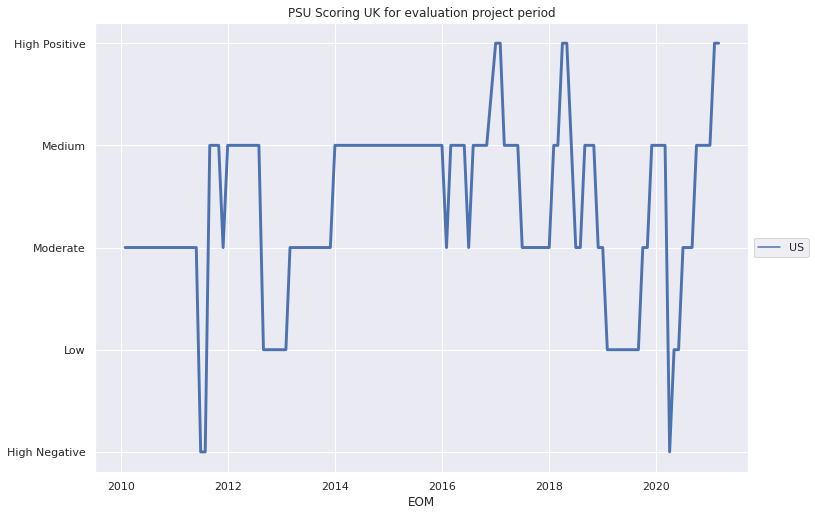

In [62]:
# prepare a plot, to have a look on the value for each region
cols = ['US']
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax1 = plt.subplots(1,1)
# dashes to False if there is more than 6 lines to plot
g = sns.lineplot(data=ds8g.loc[:,cols], dashes=True, linewidth=2.9)
g.set_yticks([1,2,3,4,5])
g.set_yticklabels(['High Negative','Low','Moderate','Medium','High Positive'])
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('PSU Scoring {} for evaluation project period'.format('UK'))
plt.show()

In [63]:
ds6.head(4)

,SRC_UID,EOM,WEIGHTED,COUNTRY,PSU
0,880923451687,31.07.2019,0.4083,GERMANY,Eurozone
1,219007141108021,31.07.2019,0.2169,U.S.A.,US
2,1461078666,30.11.2018,0.2297,SWITZERLAND,Switzerland
3,189669396589741,30.11.2018,0.1864,CHINA,China


In [64]:
ds8.sample(4)

,PSU_DATE_EOM,US,Eurozone,UK,Switzerland,Europe,Japan,Australia,China,Emerging Asia (ex-China),Latin America,EMEA,Emerging,World,EOM
54,2016-06-30,3,2,2,2,2,2,3,3,3,2,3,3,3,2016-06-30
3,2020-11-30,4,3,3,4,3,4,4,4,4,3,3,4,4,2020-11-30
36,2018-02-28,4,4,2,5,4,4,3,2,3,4,4,3,3,2018-02-28
11,2020-03-31,1,1,1,1,1,1,1,1,1,1,1,1,1,2020-03-31


In [65]:

ds8.reset_index(inplace=True)
ds8.set_index('EOM',inplace=True)
for idx6, r6 in ds6.iterrows():
    booking_date = pd.to_datetime(ds6.loc[idx6,'EOM'])
    booking_date=booking_date.strftime('%Y-%m-%d')
    #print(booking_date)
    #make a filter and get the value for US
    psu_code = ds6.loc[idx6,'PSU']
    try:
        v=ds8[booking_date][psu_code][0]
        ds6.loc[idx6,'PSU_SCORE']=v
    except:
        None

In [66]:
ds6

,SRC_UID,EOM,WEIGHTED,COUNTRY,PSU,PSU_SCORE
0,880923451687,31.07.2019,0.4083,GERMANY,Eurozone,3.0
1,219007141108021,31.07.2019,0.2169,U.S.A.,US,2.0
2,1461078666,30.11.2018,0.2297,SWITZERLAND,Switzerland,3.0
3,189669396589741,30.11.2018,0.1864,CHINA,China,4.0
4,206670719,30.11.2018,0.9729,SWITZERLAND,Switzerland,3.0
...,...,...,...,...,...,...
9196,206670716,31.01.2021,0.2240,UNITED KINGDOM,UK,3.0
9197,1489765858,31.01.2021,0.5944,AUSTRALIA,Australia,5.0
9198,188703129863464,31.01.2021,0.9981,RUSSIA,World,4.0
9199,413976258580,31.01.2021,0.6770,U.S.A.,US,5.0


In [67]:
ds6.isnull().sum()

SRC_UID        0
EOM            0
WEIGHTED       0
COUNTRY        0
PSU            0
PSU_SCORE    141
dtype: int64

### psu Dataset
The final psu dataset contains on a monthly frequency for each fund the psu score related to the most weigthed country in which the fund invests.

In [68]:
# save psu dataset in a csv file
ds6.to_csv(path_data_source+'final_psu_scoring_by_fund.csv')

<hr>

## documentation downloaded

The file final_document_downloaded.csv is a extract from a log table in the analytics system on the Digital Library. It gives the monthly number of document downloaded for a fund.

In [69]:
ds9 = pd.read_csv(path_data_source+'monthly_documents_downloaded.csv', delimiter=',')
ds9.shape

(18128, 5)

In [70]:
ds9.sample(9)

,Unnamed: 0,YEAR,MONTH,FUND,CNT
4682,4682,2013,6,Anas bahamensis,32
3371,3371,2012,9,Macaca mulatta,624
4404,4404,2013,4,Lutra canadensis,3216
724,724,2011,3,Gorilla gorilla,6
7518,7518,2015,2,Mirounga angustirostris,669
1028,1028,2011,5,unavailable,112
16688,16688,2020,5,Isoodon obesulus,972
420,420,2011,1,Herpestes javanicus,112
9143,9143,2016,2,Tiliqua scincoides,776


In [71]:
ds9a=ds9.merge(ds1.loc[:,['NAME','SRC_UID']], left_on='FUND', right_on='NAME', how='left').dropna()
ds9a.drop('NAME',axis=1, inplace=True)
ds9a['SRC_UID'] = ds9a['SRC_UID'].astype('int64') 
ds9a

,Unnamed: 0,YEAR,MONTH,FUND,CNT,SRC_UID
1,1,2010,10,Petaurus breviceps,1147,192291882972375
5,5,2010,10,Gekko gecko,2154,206670770
6,6,2010,10,Lepilemur rufescens,1855,181701414249
7,7,2010,10,Echimys chrysurus,2940,206670742
10,10,2010,10,Melophus lathami,974,323418458
...,...,...,...,...,...,...
18117,18117,2021,3,Isoodon obesulus,391,188703116701652
18118,18118,2021,3,Myiarchus tuberculifer,385,206670721
18119,18119,2021,3,Madoqua kirkii,161,1676124906944
18120,18120,2021,3,Chloephaga melanoptera,118,38326395382


In [72]:
# create an eom colum in documentation file
for idx, r in ds9a.iterrows():
    datestr = str(ds9a.loc[idx,'YEAR']) + '-' + str(ds9a.loc[idx,'MONTH']) + '-01'
    ds9a.loc[idx,'PERIOD'] = pd.to_datetime(datestr)

# compute EOM for flows
ds9a['EOM'] = ds9a['PERIOD'].apply(last_day_month)
ds9a.drop(['PERIOD','YEAR','MONTH'], axis=1, inplace=True)

### documention indicators
The dataset contains 1 row per funds and period (EoM) and the number of document (one of the client interest - potential investor or existing investor) downloaded.

The dataset is saved in csv file.

In [73]:
ds9a.to_csv(path_data_source+'final_document_indicator.csv')
ds9 = ds9a.copy()

<hr>

## funds fees
Each funds has different fees which can influence investor before subscription. The source give an average fees (administration & management) per fund.

In [74]:
ds10 = pd.read_csv(path_data_source+'fund_fees_adm_mgt.csv', delimiter=',', decimal=',')

In [75]:
ds10

,Unnamed: 0,FUND_NAME,ADMINSTRATION_FEES,MANAGEMENT_FEES
0,0,Agkistrodon piscivorus,0.0011,0.00439286
1,1,Balearica pavonina,0.003,0.013
2,2,Propithecus verreauxi,0.0030125,0.0099375
3,3,Gekko gecko,0.00195,0.012
4,4,Lepilemur rufescens,0.00173125,0.008375
...,...,...,...,...
144,144,Ovis canadensis,0.0,0.0
145,145,Cacatua tenuirostris,6.667e-05,0.00066667
146,146,Caiman crocodilus,0.0,0.0
147,147,Phaethon aethereus,0.0001,0.0


In [76]:
ds10=ds10.merge(ds1, how='inner', left_on='FUND_NAME', right_on='NAME')

In [77]:
ds10

,Unnamed: 0_x,FUND_NAME,ADMINSTRATION_FEES,MANAGEMENT_FEES,Unnamed: 0_y,MULTI_MANAGER_STRUCTURE,NAME,SOFTCLOSING,SRC_UID,RISK_LEVEL,DATE_SHARE,CNT_SHARE,Strategy Capability,Capability IS Strategic
0,1,Balearica pavonina,0.003,0.013,0,0,Balearica pavonina,1.0,198188413318323,Moderate risk,03.07.2014,11,Absolute Return,Yes
1,3,Gekko gecko,0.00195,0.012,1,0,Gekko gecko,0.0,206670770,High risk,27.04.2000,13,Emerging Markets,Yes
2,4,Lepilemur rufescens,0.00173125,0.008375,2,1,Lepilemur rufescens,0.0,181701414249,Moderate risk,26.06.2006,18,Emerging Markets,Yes
3,6,Canis aureus,0.00303333,0.01008333,51,0,Canis aureus,0.0,186614022288995,High risk,01.10.2010,13,Absolute Return,Yes
4,86,Canis aureus,0.00298571,0.01242857,51,0,Canis aureus,0.0,186614022288995,High risk,01.10.2010,13,Absolute Return,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,129,Alouatta seniculus,0.0003,0.0085,85,0,Alouatta seniculus,1.0,206670711,High risk,13.01.1994,5,Core & Specialist Equities,No
93,132,Tauraco porphyrelophus,0.00228667,0.01206667,86,1,Tauraco porphyrelophus,0.0,656760542396,High risk,29.09.2008,17,Thematic,Yes
94,137,Myiarchus tuberculifer,0.000805,0.00246,88,1,Myiarchus tuberculifer,0.0,206670721,Moderate / high risk,13.10.1999,24,Indexed Equities,No
95,139,Chloephaga melanoptera,0.00085,0.0025,90,1,Chloephaga melanoptera,0.0,38326395382,Low / moderate risk,18.09.2003,8,Credit,No


In [78]:
ds10.to_csv(path_data_source+'final_funds_fees.csv')


<hr>

## rfp data
The Request For Proposal are indicators of how many request we formally answered by month and by funds.
I am taking a few columns to avoid confidential data.

- RFP ID (which is an internal key for the team)
- Status (will help to rank the interest for product / strategy)
- Asset class, strategy & product name
- Date

In [79]:
ds11 = pd.read_csv(path_data_source+'monthly_rfp.csv', delimiter=',', decimal='.', parse_dates=['Creation Date'] )
# convert Creation Date to DateTime types and add the EOM colum
#ds11['Creation Date'] = pd.to_datetime(ds11['Creation Date'], dayfirst=True)

ds11['Date'] = pd.to_datetime(ds11['Creation Date'].dt.date)
ds11['EOM'] = ds11['Date'].apply(last_day_month)
try:
    ds11.drop('Unnamed: 0', axis=1, inplace=True)
except:
    None
ds11

,Creation Date,Product,Product Type,RFP ID,Status,Date,EOM
0,2013-05-27 10:32:00,Anas bahamensis,2.0,2013-0001,Completed,2013-05-27,2013-05-31
1,2013-05-27 10:41:00,Haematopus ater,1.0,2013-0002,Completed,2013-05-27,2013-05-31
2,2013-05-27 10:51:00,Rhea americana,2.0,2013-0003,Completed,2013-05-27,2013-05-31
3,2013-05-27 10:54:00,Charadrius tricollaris,1.0,2013-0004,Rejected,2013-05-27,2013-05-31
4,2013-05-27 10:57:00,Amblyrhynchus cristatus,1.0,2013-0005,Rejected,2013-05-27,2013-05-31
...,...,...,...,...,...,...,...
10359,2020-12-31 00:00:00,Ourebia ourebi,NaN,NaN,Done,2020-12-31,2020-12-31
10360,2020-12-31 00:00:00,Hymenolaimus malacorhynchus,NaN,NaN,In Progress,2020-12-31,2020-12-31
10361,2021-02-26 00:00:00,Charadrius tricollaris,NaN,NaN,Done,2021-02-26,2021-02-28
10362,2020-12-31 00:00:00,Myrmecobius fasciatus,NaN,NaN,Done,2020-12-31,2020-12-31


In [80]:
ds11.dtypes

Creation Date    datetime64[ns]
Product                  object
Product Type            float64
RFP ID                   object
Status                   object
Date             datetime64[ns]
EOM              datetime64[ns]
dtype: object

### Product Type
Product Type indicates if the RFP is for a funds (<b>my scope</b>) or a mandate. There is a lot of null value I don't want to loose a chance to have data.
I will replace null value by the same (most count) from other rows (which are completed).
Finally when it's not possible to find a value I will replace by 1 and the wrong rows will be eliminated during the mergre process to create the time series (Notebook 03)

In [81]:
f = ds11['Product Type'].isnull()
ds11[f]
for idx, r in ds11[f].iterrows():
    p = r['Product']
    f1 = ds11['Product'] == p
    try:
        mfv = ds11[f1]['Product Type'].value_counts().idxmax()
        ds11.loc[idx,'Product Type'] = mfv
    except:
        ds11.loc[idx,'Product Type'] = 1
            
    

In [82]:
ds11.isnull().sum()

Creation Date       0
Product             0
Product Type        0
RFP ID           2628
Status              0
Date                0
EOM                 0
dtype: int64

In [83]:
ds11.head()

,Creation Date,Product,Product Type,RFP ID,Status,Date,EOM
0,2013-05-27 10:32:00,Anas bahamensis,2.0,2013-0001,Completed,2013-05-27,2013-05-31
1,2013-05-27 10:41:00,Haematopus ater,1.0,2013-0002,Completed,2013-05-27,2013-05-31
2,2013-05-27 10:51:00,Rhea americana,2.0,2013-0003,Completed,2013-05-27,2013-05-31
3,2013-05-27 10:54:00,Charadrius tricollaris,1.0,2013-0004,Rejected,2013-05-27,2013-05-31
4,2013-05-27 10:57:00,Amblyrhynchus cristatus,1.0,2013-0005,Rejected,2013-05-27,2013-05-31


In [84]:
ds11['Product Type'].value_counts()

1.0    9624
2.0     740
Name: Product Type, dtype: int64

In [85]:
f = ds11['Product Type'] == 1
ds11 = ds11[f].copy()
ds11.shape

(9624, 7)

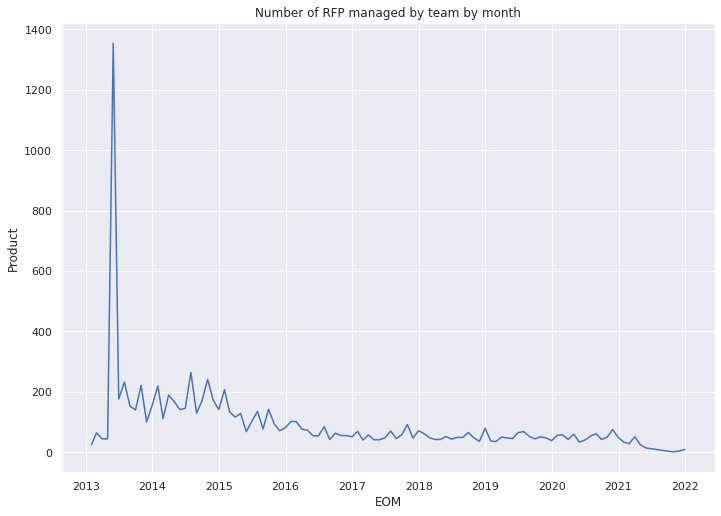

In [86]:
# plot a line to see number of rfp by month
# during EDA I will deal with outliers
sns.lineplot(data=ds11.groupby(['EOM']).count().reset_index(), x="EOM", y="Product")
plt.title('Number of RFP managed by team by month')
plt.show();

### Outlier in serie
I have an outlier in the serie probably the consequence of the initialization of the KPI system in May 2013. I will arnage this value in the EDA Notebook.

<hr>


### Save the dataframe
I will merge the dataframe with the fundscope dataframe to get the SRC_UID key for each row. Then the file will be saved.

In [87]:
ds11.merge(ds1[['NAME','SRC_UID']], left_on='Product', right_on='NAME').drop(['Product','Date'], axis=1).to_csv(path_data_source+'final_rfp_indicators.csv')


<hr>

## Monthly Events indicators

The csv file events_impacts.csv contains 2 coluns with a data an an event impact indicator which was calculated in previous notebook.

I will load this data and compute a rank by EOM by taking the sum of all month events.

In [88]:
ds12 = pd.read_csv(path_data_source+'events_impacts.csv', delimiter=',', decimal='.', parse_dates=['End Date'] )

In [89]:
try:
    ds12.drop('Unnamed: 0', axis=1, inplace=True)
except:
    None
    
ds12['EOM'] = ds12['End Date'].apply(last_day_month)
ds12.groupby('EOM').sum()

,EVENT_IMPACT
EOM,
2010-04-30,1.000000
2011-01-31,1.000000
2012-03-31,1.000000
2013-05-31,1.000000
2015-01-31,5.704963
...,...
2021-08-31,0.786624
2021-09-30,2.390625
2021-10-31,8.845036


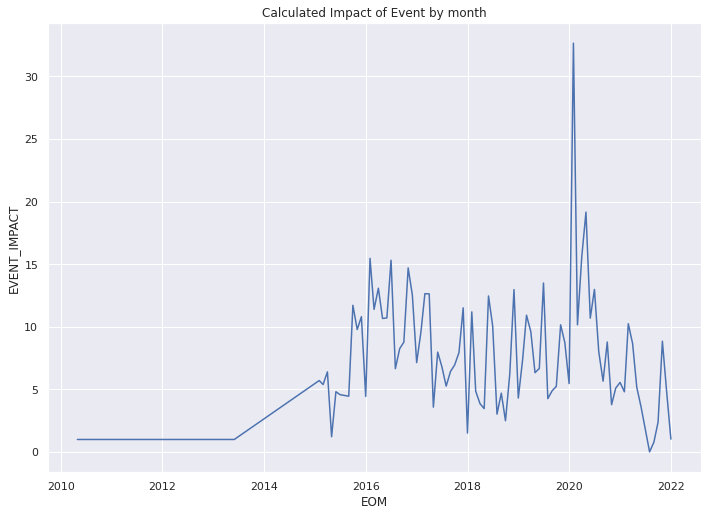

In [90]:
# plot a line to see events impacts
# during EDA I will deal with outliers if existing
sns.lineplot(data=ds12.groupby(['EOM']).sum().reset_index(), x="EOM", y="EVENT_IMPACT")
plt.title('Calculated Impact of Event by month')
plt.show();

In [91]:
ds12[['EOM','EVENT_IMPACT']].groupby('EOM').sum().reset_index().to_csv((path_data_source+'final_events_impact.csv'))